# Guardar batimetria como archivo jpg

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [2]:
h = loadmat('MorenoCS_h.mat')

In [3]:
z = h['zh'][0,0]
x = h['xh'][0,0][0,:]
y = h['yh'][0,0][0,:]

In [4]:
zt = np.trunc( (z-z.min())/(z.max()-z.min())*255. )
err = zt*(z.max()-z.min())/255.+z.min()-z
errrel = np.where( 1-np.isclose(z,0.0), np.abs(err)/z, 0.0)

/home/jose/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log
/home/jose/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in log
/home/jose/anaconda2/lib/python2.7/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


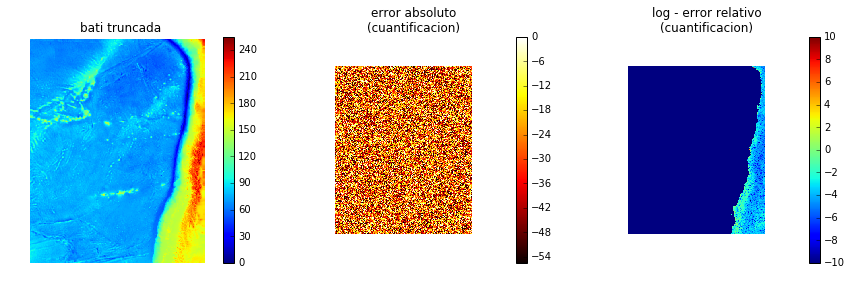

In [5]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.pcolormesh(zt)
plt.colorbar()
plt.title('bati truncada')
plt.axis('off')

plt.subplot(132)
plt.pcolormesh(x,y,err,cmap=plt.cm.hot)
plt.colorbar()
plt.title('error absoluto\n(cuantificacion)')
plt.axis('off')

plt.subplot(133)
plt.pcolormesh(x,y,np.log(errrel),vmin=-10.,vmax=10.)
plt.colorbar()
plt.title('log - error relativo\n(cuantificacion)')
plt.axis('off')

plt.tight_layout()

Al truncar a 8 bits se ve que hay errores del orden o más chicos que $10^{-2}$  (relativo).

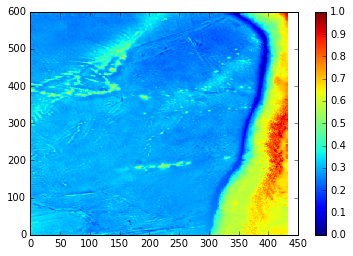

In [6]:
plt.pcolormesh(zt/255.)
plt.colorbar()

In [7]:
import scipy

In [8]:
im = scipy.misc.toimage(np.flipud(z))
im.save('bati1.jpg')

Propiedades de la batimetría

In [9]:
f = open('bati1.txt','w')
f.write('ny   :%i\n'%z.shape[0])
f.write('nx   :%i\n'%z.shape[1])
f.write('xmin :%.3f\n'%x.min())
f.write('xmax :%.3f\n'%x.max())
f.write('ymin :%.3f\n'%y.min())
f.write('ymax :%.3f\n'%y.max())
f.write('zmin :%.3f\n'%z.min())
f.write('zmax :%.3f\n'%z.max())
f.close()

In [10]:
!cat bati1.txt

ny   :594
nx   :432
xmin :-836516.000
xmax :1048678.000
ymin :5451636.000
ymax :8045418.000
zmin :-8104.293
zmax :6051.971


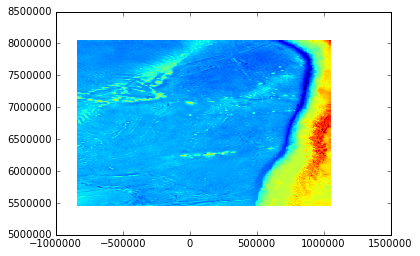

In [11]:
plt.pcolormesh(x,y,z)